In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import math

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#for evaluationg our ML results
from sklearn import metrics

# Dataset import 
import statsmodels.api as sm

## Basic Mathematical Overview
[Logistic Function](http://en.wikipedia.org/wiki/Logistic_function)
\begin{equation}
    f(x)
        = \dfrac{1}{1+e^{-x}}
\end{equation}



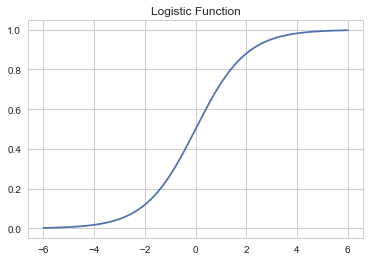

In [13]:
def logistic(x):
    return 1/(1+math.exp((-1)*x))

# set x from -6 to 6 (500 elements)
x=np.linspace(start=-6,stop=6,num=500)

y=np.array([logistic(ele) for ele in x])

plt.plot(x,y)
plt.title('Logistic Function')

### Data visualisation

In [15]:
# statsmodels' data has standard type of dataframe
df= sm.datasets.fair.load_pandas().data
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [16]:
# binominal for affair
def affair_check(x):
    if x !=0:
        return 1
    else:
        return 0 
    
df['Had_Affair'] = df['affairs'].apply(affair_check)

df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [18]:
df.tail()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.0,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.0,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.0,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.0,0
6365,4.0,22.0,2.5,0.0,2.0,16.0,2.0,4.0,0.0,0


In [21]:
df.groupby('Had_Affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


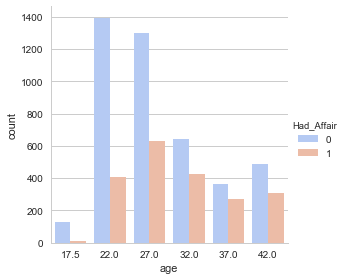

In [22]:
sns.factorplot('age',hue='Had_Affair',palette='coolwarm',data=df,kind='count')

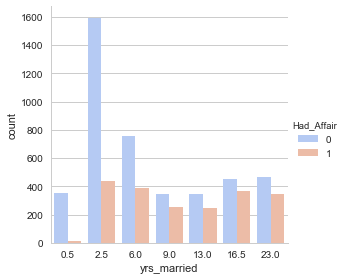

In [25]:
sns.factorplot('yrs_married',data=df,hue='Had_Affair',palette='coolwarm',kind='count')

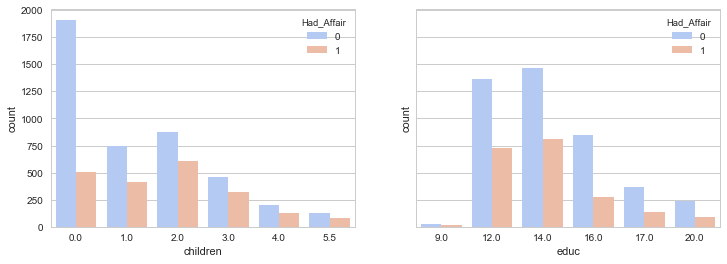

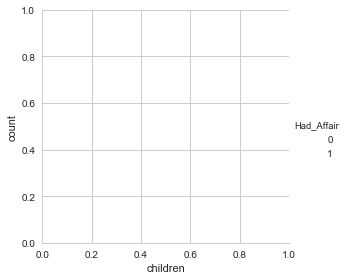

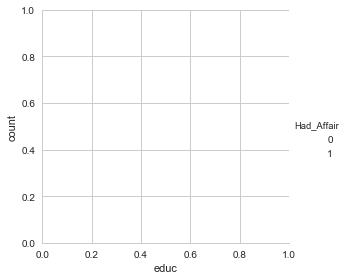

In [37]:
fig, (figa,figb) = plt.subplots(ncols=2,sharey=True, figsize=(12,4))
sns.factorplot('children',data=df,hue='Had_Affair',kind='count',palette='coolwarm',ax=figa)
sns.factorplot('educ',data=df,hue='Had_Affair',kind='count',palette='coolwarm',ax=figb)
# why extra two figs appear?

### Data Preparation

In [41]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


Notice occupation and occupation_dusb are categocial variables  
Pandas has a built-in method of gtting dummy variables and creating new columns for them

In [43]:
# Create new DF for categorical variables 
occ_dummies= pd.get_dummies(df['occupation'])
hus_occ_dummies= pd.get_dummies(df['occupation_husb'])
occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [44]:
# create col names for new DF
occ_dummies.columns=['occ1','occ2','occ3','occ4','occ5','occ6']
hus_occ_dummies.columns= ['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [51]:
# create new dataframe for X and Y
Y=df.Had_Affair
X=pd.concat([df, occ_dummies, hus_occ_dummies],axis=1).drop(['occupation','occupation_husb','Had_Affair'],axis=1) # We dont remove col 'affairs' now  
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


In [52]:
# drop occ1 and hooc1 because they have perfuct multicolinearity (see 'http://en.wikipedia.org/wiki/Multicollinearity#Remedies_for_multicollinearity')
X=X.drop(['occ1','hocc1','affairs'],axis=1)
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0


In [53]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Had_Affair, dtype: int64

In [54]:
# In scikit-learn, Y needs to be 1D array
Y=np.ravel(Y)
Y

array([1, 1, 1, ..., 0, 0, 0])

In [55]:
logistic_model= LogisticRegression()
logistic_model.fit(X,Y)

logistic_model.score(X,Y)

0.72588752748978946

72.6% accuracy rating 

In [56]:
Y.mean()

0.32249450204209867

32% of women had an affair, i.e if the model simply hypothesised no affairs for all women, then accuracy is 68%

In [57]:
logistic_model.coef_

array([[-0.69784551, -0.05633632,  0.10389299,  0.01818532, -0.36850664,
         0.00864737,  0.29811889,  0.60815029,  0.34651127,  0.94225955,
         0.9181501 ,  0.21995711,  0.324766  ,  0.18935412,  0.21309295,
         0.21417995]])

In [88]:
coef_df=DataFrame(list(zip(X.columns, np.transpose(logistic_model.coef_))))  #  zip(a,b) in python2 is now list(zip(a,b)) in python3
coef_df

,0,1
0,rate_marriage,[-0.697845509654]
1,age,[-0.0563363245639]
2,yrs_married,[0.103892991874]
3,children,[0.0181853214414]
4,religious,[-0.368506640382]
5,educ,[0.00864737414573]
6,occ2,[0.298118886549]
7,occ3,[0.60815029105]
8,occ4,[0.346511268985]
9,occ5,[0.942259551778]


all the dummy variables has positive coef -> increases the probability of having an affair.  
This means that being a student (occ,hocc =1) decreases the chance of an affair

### Training and Testing DataSets

In [89]:
X_train,X_test, Y_train,Y_test= train_test_split(X,Y)

In [90]:
logistic_model2=LogisticRegression()
logistic_model2.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [91]:
class_predict= logistic_model2.predict(X_test)

In [94]:
metrics.accuracy_score(y_true=Y_test, y_pred=class_predict)

0.72487437185929648